# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Putri Angel Saraswati
- **Email:** putriangel5946@gmail.com
- **ID Dicoding:** putsrswt

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca, musim, dan suhu mempengaruhi jumlah penyewaan sepeda?
- Apakah ada perbedaan penggunaan sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat tabel day
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day_df.shape

(731, 16)

In [4]:
# Memuat tabel hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour_df.shape

(17379, 17)

**Insight:**
- Tabel Day memiliki data sebanyak 731 baris dengan kolom berjumlah 16.
- Tabel Hour memiliki data sebanyak 17379 baris dengan kolom berjumlah 17.

Perbedaan tabel Day dan Hour yaitu tabel Day tidak memiliki kolom yang menampung value jam (hr).

### Assessing Data

In [6]:
# Cek missing value dan tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Cek data duplikat
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
# Melihat nilai statistik deskriptif
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Cek missing value dan tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# Cek data duplikat
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# Melihat nilai statistik deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Baik tabel Day maupun Hour tidak memiliki data yang duplikat.
- Tabel Day dan Hour memilki tipe data yang salah, yaitu dteday yang harusnya bertipe datetime.
- Baik tabel Day maupun Hour tidak memiliki data yang inaccurate ataupun outlier.

### Cleaning Data

In [12]:
# Mengubah dteday menjadi date
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
# Mengubah dteday menjadi date
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
Kolom dteday diubah menjadi tipe data date menggunakan fungsi to_datetime. Sekarang semua kolom pada tabel Day dan Hour telah memiliki tipe data yang sesuai.

## Exploratory Data Analysis (EDA)

### Explore cuaca, musim, dan suhu

In [16]:
# Menghitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca
weather_rentals = day_df.groupby('weathersit')['cnt'].mean().reset_index()
weather_rentals.columns = ['Weather', 'Average Rentals']

print(weather_rentals)

   Weather  Average Rentals
0        1      4876.786177
1        2      4035.862348
2        3      1803.285714


In [17]:
# Menghitung rata-rata penyewaan sepeda berdasarkan musim
season_rentals = day_df.groupby('season')['cnt'].mean().reset_index()
season_rentals.columns = ['Season', 'Average Rentals']

print(season_rentals)

   Season  Average Rentals
0       1      2604.132597
1       2      4992.331522
2       3      5644.303191
3       4      4728.162921


In [18]:
# Menghitung korelasi antara suhu dan penyewaan sepeda
temp_corr = day_df['temp'].corr(day_df['cnt'])
print(f"Korelasi antara suhu dan jumlah penyewaan: {temp_corr}")

Korelasi antara suhu dan jumlah penyewaan: 0.6274940090334918


### Explore hari kerja dan hari libur

In [19]:
# Menghitung rata-rata penyewaan sepeda berdasarkan hari kerja
workingday_rentals = day_df.groupby('workingday')['cnt'].mean().reset_index()
workingday_rentals.columns = ['Working Day', 'Average Rentals']

print(workingday_rentals)

   Working Day  Average Rentals
0            0      4330.168831
1            1      4584.820000


In [20]:
# Menghitung rata-rata penyewaan sepeda berdasarkan hari libur
holiday_rentals = day_df.groupby('holiday')['cnt'].mean().reset_index()
holiday_rentals.columns = ['Holiday', 'Average Rentals']

print(holiday_rentals)

   Holiday  Average Rentals
0        0      4527.104225
1        1      3735.000000


### Explore jam, hari, dan bulan

In [21]:
# Menghitung rata-rata penyewaan sepeda berdasarkan jam
hourly_rentals = hour_df.groupby('hr')['cnt'].mean().reset_index()
hourly_rentals.columns = ['Hour', 'Average Rentals']

print(hourly_rentals)

    Hour  Average Rentals
0      0        53.898072
1      1        33.375691
2      2        22.869930
3      3        11.727403
4      4         6.352941
5      5        19.889819
6      6        76.044138
7      7       212.064649
8      8       359.011004
9      9       219.309491
10    10       173.668501
11    11       208.143054
12    12       253.315934
13    13       253.661180
14    14       240.949246
15    15       251.233196
16    16       311.983562
17    17       461.452055
18    18       425.510989
19    19       311.523352
20    20       226.030220
21    21       172.314560
22    22       131.335165
23    23        87.831044


In [22]:
# Menghitung rata-rata penyewaan sepeda berdasarkan hari
weekday_rentals = day_df.groupby('weekday')['cnt'].mean().reset_index()
weekday_rentals.columns = ['Weekday', 'Average Rentals']

print(weekday_rentals)

   Weekday  Average Rentals
0        0      4228.828571
1        1      4338.123810
2        2      4510.663462
3        3      4548.538462
4        4      4667.259615
5        5      4690.288462
6        6      4550.542857


In [23]:
# Menghitung rata-rata penyewaan sepeda berdasarkan bulan
month_rentals = day_df.groupby('mnth')['cnt'].mean().reset_index()
month_rentals.columns = ['Month', 'Average Rentals']

print(month_rentals)

    Month  Average Rentals
0       1      2176.338710
1       2      2655.298246
2       3      3692.258065
3       4      4484.900000
4       5      5349.774194
5       6      5772.366667
6       7      5563.677419
7       8      5664.419355
8       9      5766.516667
9      10      5199.225806
10     11      4247.183333
11     12      3403.806452


**Insight:**
Berdasarkan analisis data penyewaan sepeda, ditemukan bahwa faktor cuaca, musim, suhu, dan hari dalam minggu memiliki pengaruh signifikan terhadap jumlah penyewaan. Cuaca cerah dan suhu yang nyaman cenderung meningkatkan penyewaan sepeda, sementara cuaca buruk dan suhu yang ekstrem menurunkannya. Musim panas dan musim gugur merupakan periode dengan jumlah penyewaan tertinggi, sedangkan musim semi justru menunjukkan penurunan signifikan. Pada hari kerja dan bukan hari libur, penyewaan lebih stabil, terutama di jam-jam sibuk seperti pagi dan sore, mengindikasikan penggunaan sepeda sebagai transportasi harian.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca, musim, dan suhu mempengaruhi jumlah penyewaan sepeda?

<ipython-input-24-0e4fbd56423f>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_rentals_complete['Average Rentals_calculated'].fillna(0, inplace=True)
<ipython-input-24-0e4fbd56423f>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Rentals', y='Weather', data=weather_rentals_complete, palette=colors, orient='h')
/usr/local/lib/python3.10/dist-packages/seabo

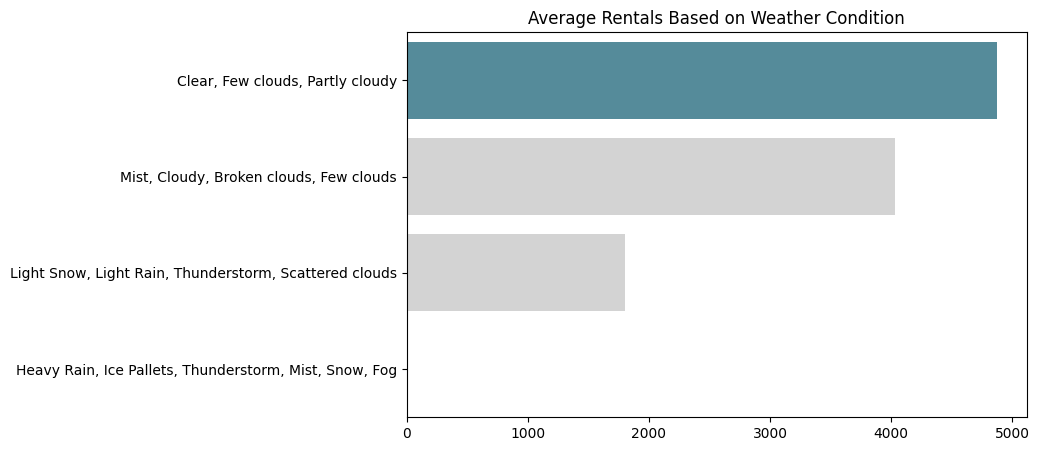

In [24]:
# Menghitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca dengan kategori lengkap (1-4)
complete_weather_categories = pd.DataFrame({
    'Weather': [1, 2, 3, 4],
    'Average Rentals': [0, 0, 0, 0]  # Default nilai untuk kategori tanpa data
})

weather_rentals = day_df.groupby('weathersit')['cnt'].mean().reset_index()
weather_rentals.columns = ['Weather', 'Average Rentals']

weather_rentals_complete = pd.merge(complete_weather_categories, weather_rentals,
                                    on='Weather', how='left', suffixes=('_default', '_calculated'))

weather_rentals_complete['Average Rentals_calculated'].fillna(0, inplace=True)
weather_rentals_complete['Average Rentals'] = weather_rentals_complete['Average Rentals_calculated']

colors = ["#4a91a5", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Mengubah angka menjadi label yang lebih deskriptif pada sumbu x
weather_labels = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist, Cloudy, Broken clouds, Few clouds',
    3: 'Light Snow, Light Rain, Thunderstorm, Scattered clouds',
    4: 'Heavy Rain, Ice Pallets, Thunderstorm, Mist, Snow, Fog'
}

# Visualisasi rata-rata penyewaan sepeda berdasarkan kondisi cuaca dalam bentuk horizontal
plt.figure(figsize=(8, 5))
sns.barplot(x='Average Rentals', y='Weather', data=weather_rentals_complete, palette=colors, orient='h')
plt.title('Average Rentals Based on Weather Condition', loc="center", fontsize=12)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.yticks(ticks=[0, 1, 2, 3], labels=[weather_labels[1], weather_labels[2], weather_labels[3], weather_labels[4]])
plt.show()

**Insight:**
- Penyewaan sepeda cenderung lebih tinggi pada cuaca yang cerah atau sedikit mendung.
- Saat cuaca buruk (hujan, salju, atau kabut), penyewaan sepeda menurun drastis. Ini wajar karena cuaca buruk membuat pengguna enggan menggunakan sepeda.

<ipython-input-25-ba3dcee638a2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Average Rentals', data=season_rentals, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gro

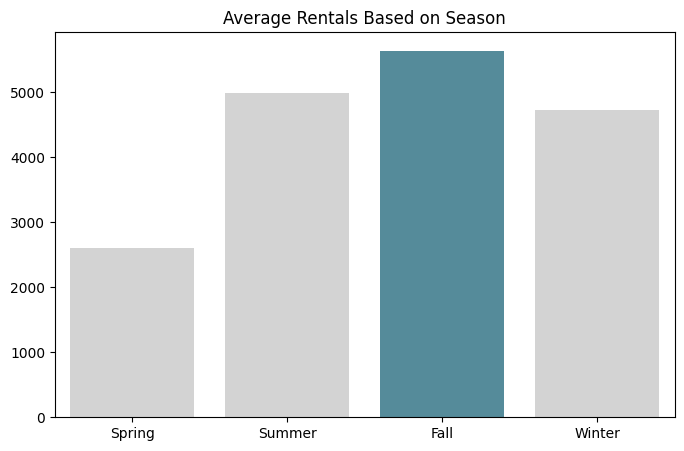

In [25]:
# Menghitung rata-rata penyewaan sepeda berdasarkan musim
season_rentals = day_df.groupby('season')['cnt'].mean().reset_index()
season_rentals.columns = ['Season', 'Average Rentals']

colors = ["#D3D3D3", "#D3D3D3", "#4a91a5", "#D3D3D3"]

# Mengubah angka menjadi label yang lebih deskriptif pada sumbu x
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Visualisasi rata-rata penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(x='Season', y='Average Rentals', data=season_rentals, palette=colors)
plt.title('Average Rentals Based on Season', loc="center", fontsize=12)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.xticks(ticks=[0, 1, 2, 3], labels=[season_labels[1], season_labels[2], season_labels[3], season_labels[4]])
plt.show()

**Insight:**
- Penyewaan sepeda cenderung lebih tinggi di musim gugur dan musim panas. Kondisi cuaca yang lebih hangat dan hari yang lebih panjang mungkin menjadi alasan di balik peningkatan ini.
- Di musim semi dan musim dingin, penyewaan sepeda lebih rendah, kemungkinan besar karena suhu yang lebih rendah dan kondisi cuaca yang kurang mendukung.

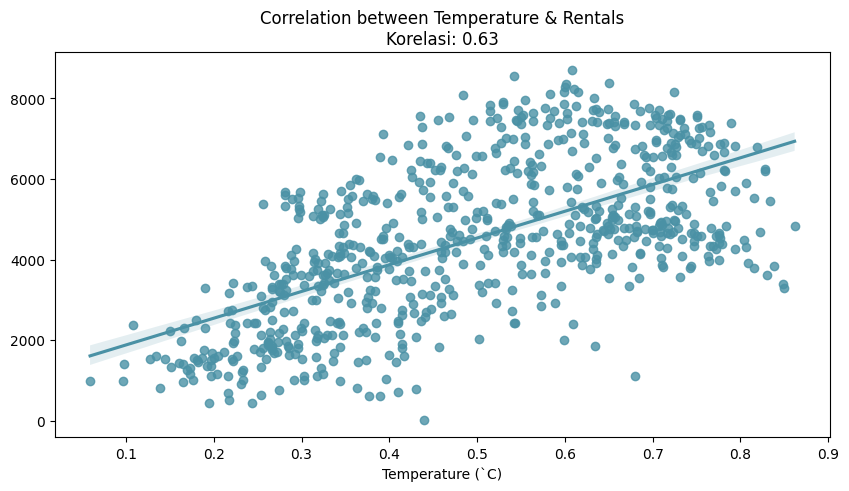

In [26]:
# Menghitung korelasi antara suhu dan penyewaan sepeda
temp_corr = day_df['temp'].corr(day_df['cnt'])

# Scatterplot hubungan antara suhu (temp) dengan jumlah penyewaan sepeda
plt.figure(figsize=(10, 5))
sns.regplot(x='temp', y='cnt', data=day_df, color='#4a91a5')
plt.title(f'Correlation between Temperature & Rentals\nKorelasi: {temp_corr:.2f}', loc="center", fontsize=12)
plt.ylabel(None)
plt.xlabel('Temperature (`C)')
plt.tick_params(axis='y', labelsize=10)
plt.show()

**Insight:**
Terdapat korelasi positif antara suhu dan penyewaan sepeda, yang menunjukkan bahwa ketika suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat. Namun, korelasi ini mungkin tidak linier karena suhu yang terlalu panas juga bisa membuat penyewaan menurun.

### Pertanyaan 2: Apakah ada perbedaan penggunaan sepeda antara hari kerja dan hari libur?

<ipython-input-27-29fef4d92a83>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=day_df, estimator='mean', ci=None, palette=colors)
<ipython-input-27-29fef4d92a83>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=day_df, estimator='mean', ci=None, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple

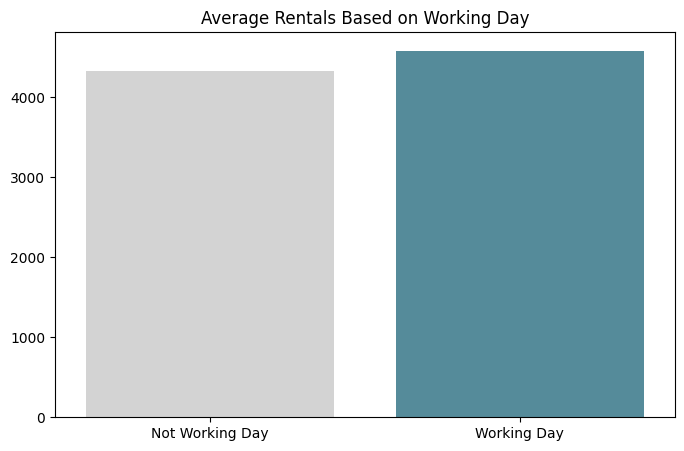

In [27]:
# Menghitung rata-rata penyewaan sepeda berdasarkan hari kerja
workingday_rentals = day_df.groupby('workingday')['cnt'].mean().reset_index()
workingday_rentals.columns = ['Working Day', 'Average Rentals']

colors = ["#D3D3D3", "#4a91a5"]

# Mengubah angka menjadi label yang lebih deskriptif pada sumbu x
workingday_labels = {1: 'Not Working Day', 2: 'Working Day'}

# Visualisasi rata-rata penyewaan sepeda berdasarkan hari kerja
plt.figure(figsize=(8, 5))
sns.barplot(x='workingday', y='cnt', data=day_df, estimator='mean', ci=None, palette=colors)
plt.title('Average Rentals Based on Working Day', loc="center", fontsize=12)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.xticks(ticks=[0, 1], labels=[workingday_labels[1], workingday_labels[2]])
plt.show()

<ipython-input-28-962c7a67ca8b>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=day_df, estimator='mean', ci=None, palette=colors)
<ipython-input-28-962c7a67ca8b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=day_df, estimator='mean', ci=None, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

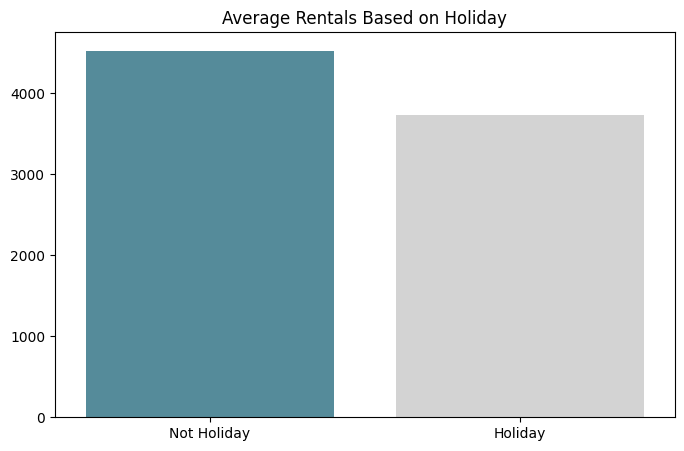

In [28]:
# Menghitung rata-rata penyewaan sepeda berdasarkan hari libur
holiday_rentals = day_df.groupby('holiday')['cnt'].mean().reset_index()
holiday_rentals.columns = ['Holiday', 'Average Rentals']

colors = ["#4a91a5", "#D3D3D3"]

# Mengubah angka menjadi label yang lebih deskriptif pada sumbu x
holiday_labels = {1: 'Not Holiday', 2: 'Holiday'}

# Visualisasi rata-rata penyewaan sepeda berdasarkan hari libur
plt.figure(figsize=(8, 5))
sns.barplot(x='holiday', y='cnt', data=day_df, estimator='mean', ci=None, palette=colors)
plt.title('Average Rentals Based on Holiday', loc="center", fontsize=12)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.xticks(ticks=[0, 1], labels=[holiday_labels[1], holiday_labels[2]])
plt.show()

**Insight:**
- Pada hari kerja, penyewaan sepeda cenderung meningkat, menunjukkan bahwa  sepeda digunakan sebagai alat transportasi harian masyarakat.
- Pada hari libur, penyewaan sepeda relatif stabil, kemungkinan besar karena sepeda tidak terlalu sering digunakan untuk rekreasi atau aktivitas santai pada waktu senggang.

### Melihat distribusi penggunaan sepeda berdasarkan jam, hari, dan bulan.

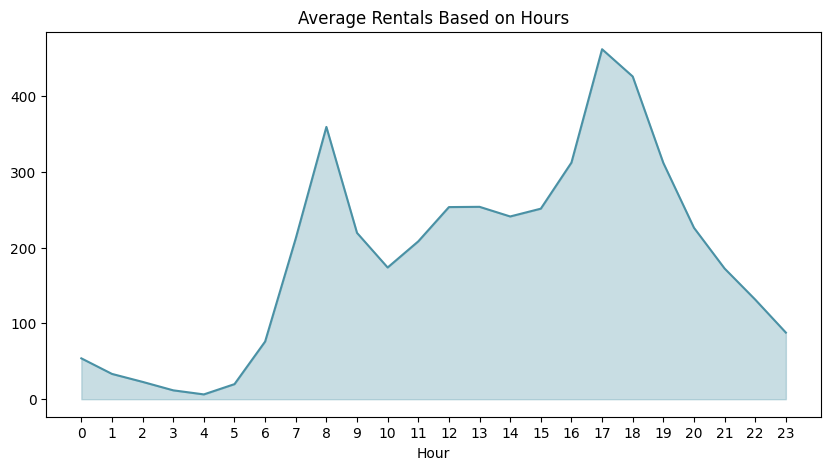

In [29]:
# Menghitung rata-rata penyewaan sepeda berdasarkan jam
hourly_rentals = hour_df.groupby('hr')['cnt'].mean().reset_index()
hourly_rentals.columns = ['Hour', 'Average Rentals']

# Visualisasi rata-rata penyewaan sepeda berdasarkan jam
plt.figure(figsize=(10, 5))
sns.lineplot(x='Hour', y='Average Rentals', data=hourly_rentals, color='#4a91a5')
plt.fill_between(hourly_rentals['Hour'], hourly_rentals['Average Rentals'], color='#4a91a5', alpha=0.3)
plt.title('Average Rentals Based on Hours', loc="center", fontsize=12)
plt.ylabel(None)
plt.xlabel('Hour')
plt.xticks(ticks=range(0, 24), labels=[i for i in range(24)])
plt.show()

**Insight:**
- Penyewaan sepeda mencapai puncaknya di pagi hari (sekitar jam 8–9) dan sore hari (sekitar jam 17–18). Ini mencerminkan pola perjalanan harian pekerja atau pelajar/mahasiswa yang menggunakan sepeda untuk pergi dan pulang dari tempat kerja atau sekolah/kampus.
- Pada malam hari dan dini hari, penyewaan cenderung lebih rendah.

<ipython-input-30-1c8434f3fc92>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekday', y='Average Rentals', data=weekly_rentals, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

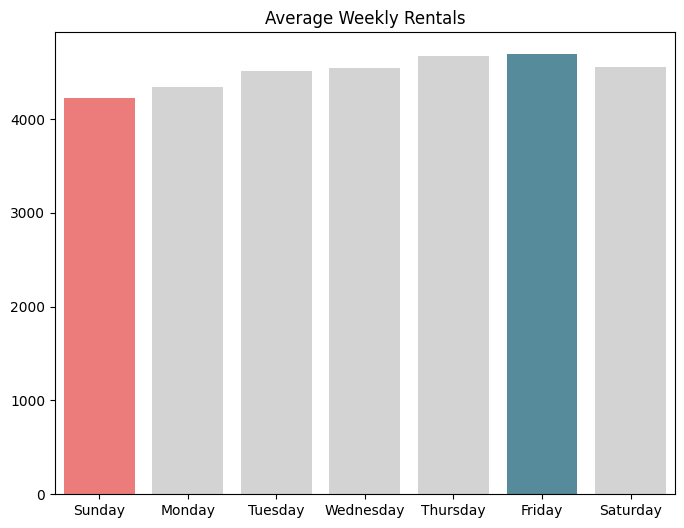

In [30]:
# Menghitung rata-rata penyewaan sepeda berdasarkan hari
weekly_rentals = day_df.groupby('weekday')['cnt'].mean().reset_index()
weekly_rentals.columns = ['Weekday', 'Average Rentals']

colors = ["#FF6969", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#4a91a5","#D3D3D3"]

# Mengubah angka menjadi label yang lebih deskriptif pada sumbu x
weekly_labels = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}

# Visualisasi rata-rata penyewaan sepeda berdasarkan hari
plt.figure(figsize=(8, 6))
sns.barplot(x='Weekday', y='Average Rentals', data=weekly_rentals, palette=colors)
plt.title('Average Weekly Rentals', loc="center", fontsize=12)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=[weekly_labels[1], weekly_labels[2], weekly_labels[3], weekly_labels[4],
                                                weekly_labels[5], weekly_labels[6], weekly_labels[7]])
plt.show()

**Insight:**
Penyewaan sepeda pada hari kerja (Senin-Jumat) cenderung lebih tinggi daripada akhir pekan (Sabtu-Minggu), mengindikasikan bahwa sepeda lebih banyak digunakan sebagai moda transportasi harian pada hari kerja.

<ipython-input-31-c2f97824cd31>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Average Rentals', data=monthly_rentals, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gro

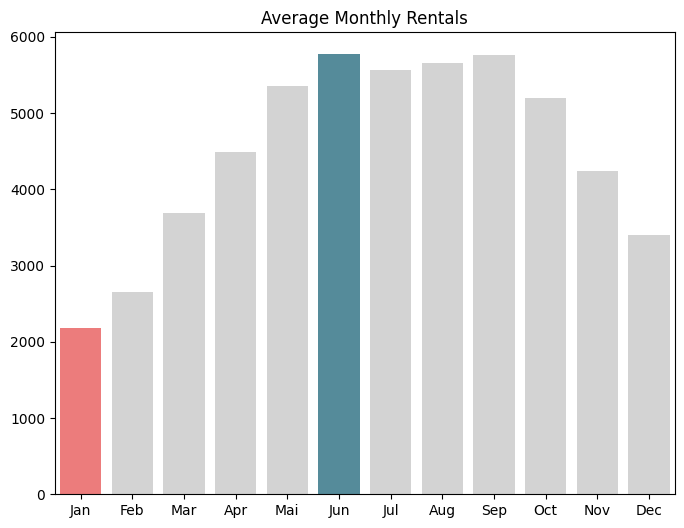

In [31]:
# Menghitung rata-rata penyewaan sepeda berdasarkan bulan
monthly_rentals = day_df.groupby('mnth')['cnt'].mean().reset_index()
monthly_rentals.columns = ['Month', 'Average Rentals']

colors = ["#FF6969", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#4a91a5","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3"]

# Mengubah angka menjadi label yang lebih deskriptif pada sumbu x
monthly_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mai', 6: 'Jun',
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Visualisasi rata-rata penyewaan sepeda berdasarkan bulan
plt.figure(figsize=(8, 6))
sns.barplot(x='Month', y='Average Rentals', data=monthly_rentals, palette=colors)
plt.title('Average Monthly Rentals', loc="center", fontsize=12)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=[monthly_labels[1], monthly_labels[2], monthly_labels[3], monthly_labels[4], monthly_labels[5], monthly_labels[6],
                                                                 monthly_labels[7], monthly_labels[8], monthly_labels[9], monthly_labels[10], monthly_labels[11], monthly_labels[12]])
plt.show()

**Insight:**
Penyewaan sepeda cenderung meningkat pada bulan-bulan musim gugur dan musim panas (sekitar Mei hingga Oktober). Pada bulan-bulan musim dingin dan musim semi (November hingga April), penyewaan menurun drastis, kemungkinan besar karena cuaca yang kurang mendukung untuk aktivitas luar ruangan.

## Analisis Lanjutan (Opsional)

In [32]:
# Membuat kategori binning berdasarkan jumlah penyewaan sepeda
bins = [0, 1000, 3000, day_df['cnt'].max()]  # Menggunakan tiga interval
labels = ['Low rentals', 'Medium rentals', 'High rentals']  # Kategori

# Menambahkan kolom 'rental_group' yang menunjukkan kategori penyewaan
day_df['rental_group'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)

day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,rental_group
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Low rentals
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Low rentals
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Medium rentals
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Medium rentals
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Medium rentals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Medium rentals
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,High rentals
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Medium rentals
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Medium rentals


In [33]:
# Melihat distribusi dari setiap kelompok
rental_distribution = day_df['rental_group'].value_counts()
print(rental_distribution)

rental_group
High rentals      559
Medium rentals    153
Low rentals        19
Name: count, dtype: int64


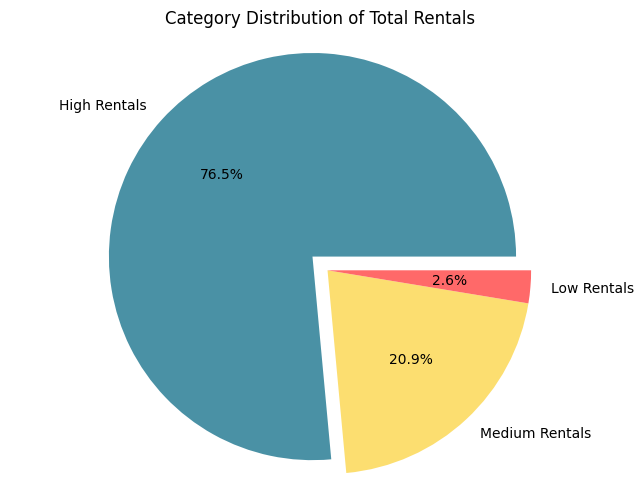

In [34]:
# Visualisasi kategori jumlah penyewaan sepeda
labels = ['High Rentals', 'Medium Rentals', 'Low Rentals']
colors = ["#4a91a5", "#FCDE70", "#FF6969"]
explode = (0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(rental_distribution, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode)
plt.title('Category Distribution of Total Rentals', loc="center", fontsize=12)
plt.axis('equal')
plt.show()

**Insight:**

Dari hasil analisis kategori jumlah penyewaan sepeda, data dikelompokkan menjadi tiga kategori: High Rentals (penyewaan tinggi), Medium Rentals (penyewaan sedang), dan Low Rentals (penyewaan rendah). Distribusi menunjukkan bahwa sebagian besar penyewaan berada dalam kategori High Rentals, dengan 559 hari masuk ke kategori ini. Sebanyak 153 hari berada dalam kategori Medium Rentals, dan hanya 19 hari tergolong dalam Low Rentals.

- Mayoritas hari (lebih dari 70%) mengalami jumlah penyewaan yang tinggi, menunjukkan bahwa layanan sepeda ini sangat populer dan digunakan secara konsisten.
- Hari-hari dengan penyewaan sedang relatif lebih sedikit, tetapi masih menunjukkan bahwa ada fluktuasi dalam penggunaan.
Jumlah hari dengan penyewaan rendah sangat kecil, menandakan bahwa layanan ini jarang mengalami penurunan drastis dalam penggunaannya.

In [35]:
# day_df.to_csv("main_data.csv", index=False)

## Conclusion

- **Conclution pertanyaan 1**

Penyewaan sepeda sangat dipengaruhi oleh faktor eksternal seperti cuaca, musim, dan suhu. Cuaca cerah dan suhu yang nyaman mendorong peningkatan penyewaan sepeda. Peningkatan ini biasa terjadi di musim semi dan musim panas sekitar bulan Mei hingga Oktober.

- **Conclution pertanyaan 2**

Hari kerja memiliki pola penyewaan yang lebih stabil dan tinggi, terutama di jam-jam sibuk (pagi hari dan sore hari), yang menunjukkan penggunaan sepeda sebagai transportasi sehari-hari. Sedangkan, pada hari libur, cenderung mengalami penurunan, yang menunjukkan bahwa sepeda tidak sering digunakan untuk berlibur.
